<a href="https://colab.research.google.com/github/Data-Citadel/DeepLearning-Assignment1/blob/main/DL_Assignment_PS5_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision Dataset-MNIST Fashion Dataset

## Assignment Details
**Question**: No.1. Vision Dataset

**Problem Statement**: MNIST Fashion data classification problem

**Group**: DL Assignment Groups 15
**Group Members**:
  * Venkataramanan Krishnan - 2018AC04529
  * Bala Kavin - 2018AC04530
  * Sonia Mawandia - 2018AC04512

## 1. Import Libraries/Dataset

In [205]:

# Import tensorflow and keras library
import tensorflow as tf

from tensorflow import keras

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# Time library
import time

## 1.1 Load Dataset

In [206]:
# Load MNIST Fashion dataset from keras library
fashion_data = keras.datasets.fashion_mnist

# Destructuring the data into train and test
(X_train_full, y_train_full), (X_test, y_test) = fashion_data.load_data()

## 1.2 GPU Availability

In [207]:
# Checking for GPU availability
print("Is GPU enabled in this machine? \n{}".format(tf.config.list_physical_devices('GPU')))

Is GPU enabled in this machine? 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 2. Data Visualization

### 2.1 Shape of Train and Test data

In [208]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [209]:
print("Shape of Training Data : {}".format(X_train_full.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Training Data : (60000, 28, 28)
Shape of Test Data : (10000, 28, 28)


In [210]:
# Number of classes
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### 2.2 Plot image data

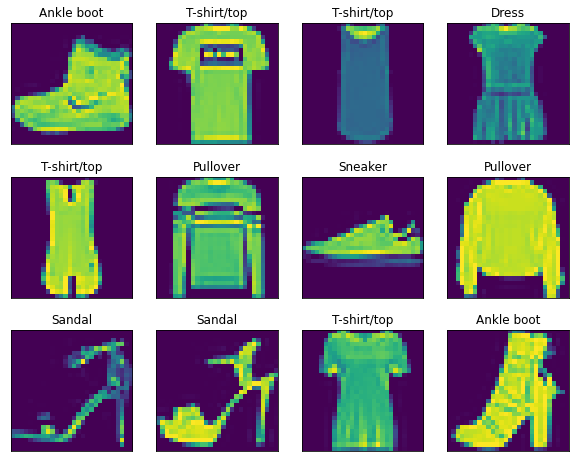

In [211]:
# The following code plots few images from the training set
plt.figure(figsize=(10,8))

for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(X_train_full[i]) # imshow() method plots the image pixels on the canvas
  index = y_train_full[i]
  plt.title(class_names[index])
  plt.xticks([])
  plt.yticks([])

plt.show()

## 3. Data Pre-Processing

### 3.1 Process the image data



In [212]:
# Convert target labels to one-hot encoding matrix
y_train_full = keras.utils.to_categorical(y_train_full)
y_test = keras.utils.to_categorical(y_test)


### 3.2 Split the data into Train, Holdout and Dev(test)

In [213]:
# The training data needs to be splited into train and validation/holdout set
# split is performed as 80:20 ratio
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [214]:
print("Shape of Training set {}".format(X_train.shape))
print("Shape of Holdout set {}".format(X_valid.shape))

Shape of Training set (48000, 28, 28)
Shape of Holdout set (12000, 28, 28)


## 4. Model Building

A function to construct a network with 3-Dense layers with appropriate input layer will be defined. 

In [242]:
def build_model():
  """
  Method to build a neural network model with min 3-hidden layers.
  """
  # L2 regularizer rate
  l2_rate = 0.0023 # 0.001 
  dropout_rate = 0.3 # Dropout rate

  model = keras.models.Sequential() # A model is built with Sequential-API

  model.add(keras.layers.Input(shape=(28, 28, 1)))
  model.add(keras.layers.Flatten()) # Flatten is used to convert the 28 x 28 pixels into 784 pixels
  model.add(keras.layers.Dense(256, activation='relu',
                               kernel_regularizer=keras.regularizers.L2(l2_rate)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(128, activation='relu',
                            kernel_regularizer=keras.regularizers.L2(l2_rate)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(64, activation='relu',
                            kernel_regularizer=keras.regularizers.L2(l2_rate)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(10, activation='softmax'))

  return model


In [243]:
# Building a model
ffnn_model = build_model()

In [244]:
ffnn_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_45 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_46 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_47 (Dropout)         (None, 64)              

## 5. Compile the model

The model is compiled with the following parameters
1. Loss Function - Categorical Cross Entropy
2. Optimizer - ADAM with learning rate $\eta=0.0001$
3. Metrics - Accuracy

### Justification:
The primary reasons for choosing `CategoricalCrossEntropy` are,
1. The Y-target value is a multiclass categorical variable, hence the `loss function` should be cross entropy. 
2. The format of y-target value used here are in one-hot encoded format, which require the loss to be categorical cross entropy. If the label was not one-hot encoded then we could use `sparse_cross_entropy` loss function. 

**Optimizer**:
1. The commonly used optimizers for categorical Y-variable can be `SGD`, `SGD+Momentum`, `AdaGrad` and `Adam`. 
2. Of these optimizers, Adam works effectively for multiclass classification dataset. 


| Optimizer | Learning Rate | Momentum | Loss | Accuracy |
|-----------|----------|------------|--- |---------|
| SGD | 0.0001 | No | 1.319 | 73% |
| SGD + Momentum | 0.0001 | 0.8 | 1.220  | 77% |
| AdaGrad | 0.0001 | No | 3.397 | 66% |
| **Adam** | 0.0001 | No | **0.549** | **86%** |



In [245]:
# Optimizer learning rate
opt_lr = 0.0001

# ffnn_model.compile(loss=keras.losses.CategoricalCrossentropy(),
#                   optimizer=keras.optimizers.SGD(learning_rate=opt_lr),
#                   metrics=['accuracy'])

# ffnn_model.compile(loss=keras.losses.CategoricalCrossentropy(),
#                   optimizer=keras.optimizers.SGD(learning_rate=opt_lr, momentum=0.8),
#                   metrics=['accuracy'])


# ffnn_model.compile(loss=keras.losses.CategoricalCrossentropy(),
#                   optimizer=keras.optimizers.Adagrad(learning_rate=opt_lr),
#                   metrics=['accuracy'])

ffnn_model.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(learning_rate=opt_lr),
                  metrics=['accuracy'])


## 6. Train Model

The model will be trained by fitting the training and validation data. 

In [247]:
epochs_run = 30 # Epoch run steps 30
batchsize = 128

# start time
start_time = time.perf_counter()

# Fitting the data
history = ffnn_model.fit(X_train, 
                         y_train, 
                         epochs=epochs_run, 
                         batch_size=batchsize,
                         validation_data=(X_valid, y_valid), 
                         verbose=1)
# Total time taken for training the given dataset
elapsed = time.perf_counter() - start_time


Epoch 1/30
375/375 [==============================] - 1s 3ms/step - loss: 1.6711 - accuracy: 0.7329 - val_loss: 1.5080 - val_accuracy: 0.7833
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 1.5995 - accuracy: 0.7424 - val_loss: 1.4452 - val_accuracy: 0.7900
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 1.5252 - accuracy: 0.7492 - val_loss: 1.3822 - val_accuracy: 0.7868
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 1.4625 - accuracy: 0.7529 - val_loss: 1.3164 - val_accuracy: 0.7985
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 1.3788 - accuracy: 0.7708 - val_loss: 1.2344 - val_accuracy: 0.8152
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 1.2942 - accuracy: 0.7846 - val_loss: 1.1582 - val_accuracy: 0.8237
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 1.2155 - accuracy: 0.7954 - val_loss: 1.0988 - val_accuracy: 0.8292
Epoch 

### Evaluating model with test data

In [248]:
val_loss, val_acc = ffnn_model.evaluate(X_test, y_test)

print("\n\nValidation Loss {:.3f} and Validation Accuracy {:.2f}%".format(val_loss, val_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.5487 - accuracy: 0.8637


Validation Loss 0.549 and Validation Accuracy 0.86%


### 6.2 Plot loss and accuracy history graphs.

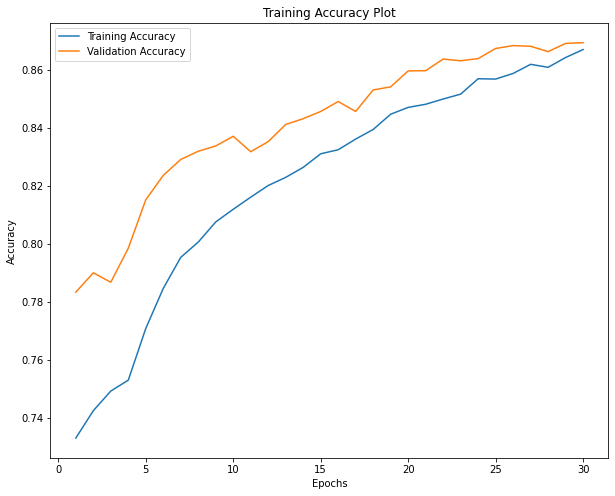

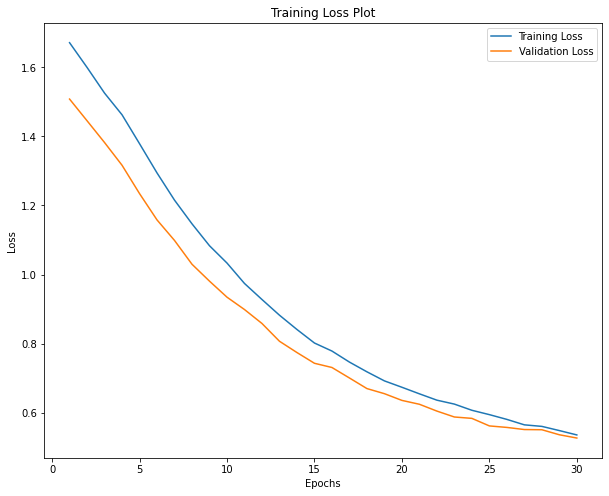

In [249]:
def evaluation_plot(history):
  """
  Method plots the model training result
  :param history: history of the model epochs run
  """
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  # Loss details
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.figure(figsize=(10,8))
  plt.plot(epochs, acc, label="Training Accuracy")
  plt.plot(epochs, val_acc, label="Validation Accuracy")
  plt.title("Training Accuracy Plot")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  # Loss and Validation loss plot
  plt.figure(figsize=(10,8))
  plt.plot(epochs, loss, label="Training Loss")
  plt.plot(epochs, val_loss, label="Validation Loss")
  plt.title("Training Loss Plot")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

# Plot the epochs run
evaluation_plot(history)

### Total time taken for training

In [222]:
print("=="*40)
print("Total time taken for training {:.2f} seconds".format(elapsed))
print("=="*40)

Total time taken for training 20.95 seconds


## 7. Model Evaluation

### a. Score with Test data


In [223]:
def model_score(nn_model, x_test, y_test):
  """
  Model scoring is a process of predicting the y-value on test data and compute the metrics on the accuracy.
  :param nn_model: Model object
  : x_test: Test dataset
  : y_test: Y-values of test data
  """
  y_preds = nn_model.predict(x_test) # Get the predictions on X_Test data

  # Converting Logits to Class code using argmax()
  y_hat = tf.argmax(y_preds, 1)
  rounded_test_labels = tf.argmax(y_test, 1) # make the one-hot encoded y-values to categorical number
  # Print the confusion matrix of the predicted values
  print("Confusion Matrix: \n {}".format(classification_report(rounded_test_labels, y_hat.numpy())))


In [224]:
# Invoking model_score() with model and test data
model_score(ffnn_model, X_test, y_test)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.72      0.85      0.78      1000
           1       0.99      0.95      0.97      1000
           2       0.71      0.70      0.71      1000
           3       0.80      0.88      0.84      1000
           4       0.62      0.80      0.70      1000
           5       0.96      0.93      0.94      1000
           6       0.63      0.33      0.43      1000
           7       0.89      0.94      0.92      1000
           8       0.96      0.93      0.95      1000
           9       0.94      0.93      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



# Hyperparameter Tuning

## 1. Model without regularization

In [225]:
def model_without_regularization():
  """
  Model without regularization 
  :return : Model with 3 hidden layers

  """
  model = keras.models.Sequential()

  model.add(keras.layers.Input(shape=(28, 28, 1)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(256, activation='relu'))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))

  return model
  

In [226]:
# model object
dn_model = model_without_regularization()
lr = 0.0001 # Learning rate

# Print model summary
print(dn_model.summary())

# Compile the model
dn_model.compile(loss="categorical_crossentropy",
                  optimizer=keras.optimizers.Adam(learning_rate=lr),
                  metrics=['accuracy'])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_93 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_94 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_95 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_96 (Dense)             (None, 10)                650       
Total params: 259,274
Trainable params: 259,274
Non-trainable params: 0
_______________________________________________

In [227]:
# Fitting the data
m_history = dn_model.fit(X_train, 
                         y_train, 
                         epochs=20, 
                         batch_size=128,
                         validation_data=(X_valid, y_valid), 
                         verbose=1)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 4.8402 - accuracy: 0.6562 - val_loss: 1.4504 - val_accuracy: 0.7408
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 1.0618 - accuracy: 0.7683 - val_loss: 0.9308 - val_accuracy: 0.7784
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.7503 - accuracy: 0.7972 - val_loss: 0.7638 - val_accuracy: 0.7857
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6138 - accuracy: 0.8174 - val_loss: 0.6798 - val_accuracy: 0.8067
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.5220 - accuracy: 0.8343 - val_loss: 0.6187 - val_accuracy: 0.8177
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4701 - accuracy: 0.8452 - val_loss: 0.5807 - val_accuracy: 0.8223
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4286 - accuracy: 0.8544 - val_loss: 0.5538 - val_accuracy: 0.8325
Epoch 

### Evaluate model with test data

In [228]:
val_loss, val_acc = dn_model.evaluate(X_test, y_test)

print("\n\nValidation Loss {:.3f} and Validation Accuracy {:.2f}%".format(val_loss, val_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.4720 - accuracy: 0.8541


Validation Loss 0.472 and Validation Accuracy 0.85%


In [229]:
# Invoking model_score() with model and test data
model_score(dn_model, X_test, y_test)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.74      0.86      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.78      0.77      1000
           3       0.87      0.86      0.86      1000
           4       0.76      0.77      0.76      1000
           5       0.94      0.94      0.94      1000
           6       0.67      0.57      0.62      1000
           7       0.93      0.91      0.92      1000
           8       0.97      0.93      0.95      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



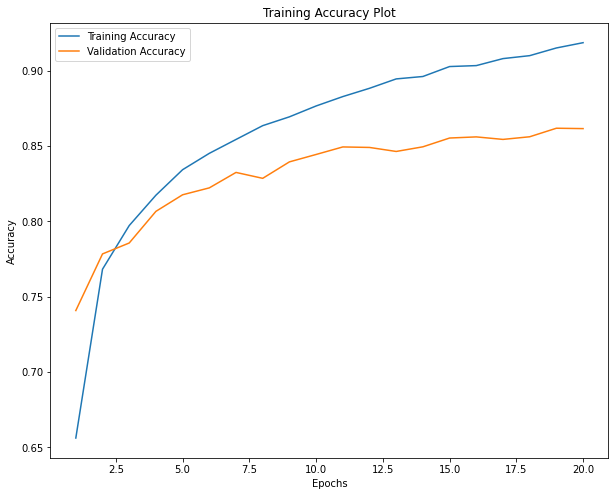

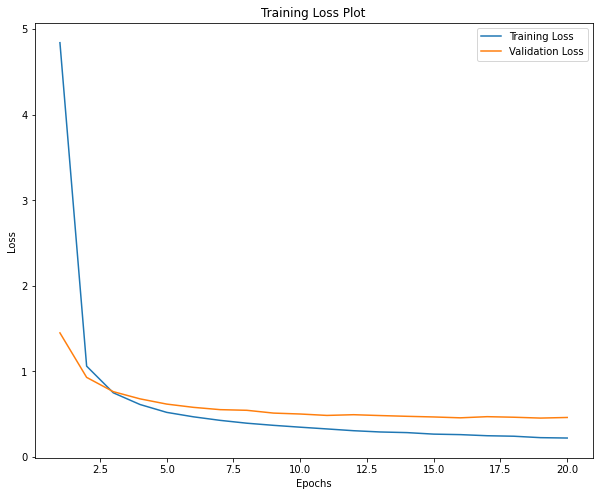

In [230]:
evaluation_plot(m_history)

## 2. Model with dropouts at different layers

In [231]:
def model_with_dropouts():
  """
  Model with only dropouts as to avoid overfitting
  :return : Constructed model

  """
  model = keras.models.Sequential()

  model.add(keras.layers.Input(shape=(28, 28, 1)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(256, activation='relu'))
  model.add(keras.layers.Dropout(0.2)) # Dropout at hidden layer 1
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.4)) # Dropout at hidden layer 3
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dropout(0.3))  # Dropout at hidden layer 4
  model.add(keras.layers.Dense(10, activation='softmax'))

  return model
  

In [232]:
# model object
dnn_model = model_with_dropouts()
lr = 0.0001
# Print model summary
print(dnn_model.summary())

# Compile the model
dnn_model.compile(loss="categorical_crossentropy",
                  optimizer=keras.optimizers.Adam(learning_rate=lr),
                  metrics=['accuracy'])

# Fitting the data
d_history = dnn_model.fit(X_train, 
                         y_train, 
                         epochs=20, 
                         batch_size=128,
                         validation_data=(X_valid, y_valid), 
                         verbose=1)



Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_42 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_99 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_43 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 64)              

### Evaluate model with test data

313/313 [==============================] - 1s 2ms/step - loss: 0.4939 - accuracy: 0.8189


Validation Loss 0.494 and Validation Accuracy 0.82%


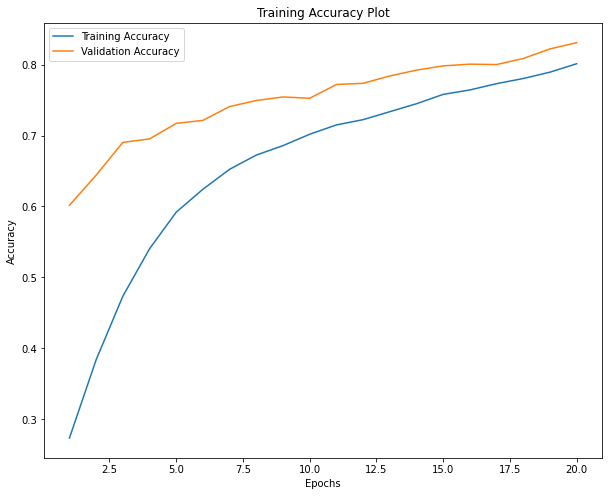

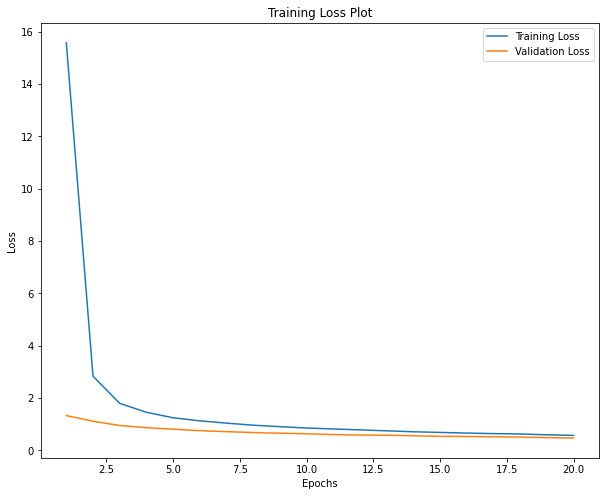

In [233]:
val_loss, val_acc = dnn_model.evaluate(X_test, y_test)

print("\n\nValidation Loss {:.3f} and Validation Accuracy {:.2f}%".format(val_loss, val_acc))

evaluation_plot(d_history)

In [234]:
# Scoring model with dev data
model_score(dnn_model, X_test, y_test)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      1000
           1       0.98      0.96      0.97      1000
           2       0.57      0.81      0.67      1000
           3       0.82      0.86      0.84      1000
           4       0.68      0.54      0.60      1000
           5       0.96      0.93      0.95      1000
           6       0.63      0.47      0.53      1000
           7       0.92      0.92      0.92      1000
           8       0.96      0.94      0.95      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



## Conclusion

The `MNIST-Fashion` dataset had a volume of **70,000 images** of various fashion materials like apparals, shoes, and accessaries. The primary objective of the model was to learn the image pixel data to classify the image into one of the 10 categorical labels.

The summary of the preprocessing, model building and evaluation is described below,

* The image data was in the shape of 28 x 28 size. 
* The training set **60,000 images** were split into **80:20** ratio for train and validation/holdout dataset, which is effectively **48,000 train** and **12,000 images** for validation. 
* The **10,000 image** data were kept as a test/dev set. 
* There were 10 unique class labels to be predicted based on the image data. 
* A deep network model was build with `L2 regularization` and `Dropout` layers at every hidden layer.
* A set of parameters used during model compilation were like,
  * Optimizer = 'Adam' with learning rate $\eta=0.0001$
  * Loss = 'Categorical Cross Entropy'
  * Metrics = 'Accuracy'

### Model Comparison

There were 3 models built with the same training and validation set. 
1. Model with `Regularization` and `Dropouts`
2. Model with just Dense layer without regularization and Dropouts
3. Model with only `Dropouts` with a probability value at different layer.

The following tabular data shows the comparison of three model results,

Model | Properties | Result|
------|------------|-------|
ffnn_model| With Regularization & Dropouts | 86%
dn_model | Just Dense layers without any regularization | 85%
dnn_model | Dropouts with different percentage value | 82%

## Comparing with **State-Of-Art Model**
Different models with comprehensive network along with convolutional layers were used to build state-of-art models. At the moment, the best `state-of-art model` for this **MNIST-Fashion** dataset is [**Fine-tuning DARTS**](https://paperswithcode.com/paper/fine-tuning-darts-for-image-classification) which has an accuracy of **95.9%**. 

Other STOA model results and comparison can be view [here.](https://paperswithcode.com/sota/fine-grained-image-classification-on-compcars)

